In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("/home/pavankumar/data_sci_dec/datasets/archive/32_Murder_victim_age_sex.csv")
df

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...
1013,Tamil Nadu,2010,Murder - Total Victims,3. Total,327.0,1908,13.0,63.0,16.0,650.0,839.0
1014,Tripura,2010,Murder - Total Victims,3. Total,24.0,159,2.0,0.0,0.0,60.0,73.0
1015,Uttar Pradesh,2010,Murder - Total Victims,3. Total,344.0,4456,82.0,138.0,126.0,2358.0,1408.0
1016,Uttarakhand,2010,Murder - Total Victims,3. Total,19.0,176,1.0,NaN,2.0,91.0,63.0


In [3]:
df.shape

(1018, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area_Name               1018 non-null   object 
 1   Year                    1018 non-null   int64  
 2   Group_Name              1018 non-null   object 
 3   Sub_Group_Name          1018 non-null   object 
 4   Victims_Above_50_Yrs    962 non-null    float64
 5   Victims_Total           1018 non-null   int64  
 6   Victims_Upto_10_15_Yrs  876 non-null    float64
 7   Victims_Upto_10_Yrs     900 non-null    float64
 8   Victims_Upto_15_18_Yrs  888 non-null    float64
 9   Victims_Upto_18_30_Yrs  1009 non-null   float64
 10  Victims_Upto_30_50_Yrs  1007 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 87.6+ KB


In [5]:
# plt.figure(figsize=(12,8))
# sns.heatmap(df.corr(),annot=True)

In [6]:
df['Area_Name'].is_unique

False

In [7]:
len(df['Area_Name'].value_counts())

35

In [8]:
df['Group_Name'].value_counts()

Murder - Total Victims     342
Murder - Male Victims      339
Murder - Female Victims    337
Name: Group_Name, dtype: int64

In [9]:
df['Sub_Group_Name'].value_counts()

3. Total             342
1. Male Victims      339
2. Female Victims    337
Name: Sub_Group_Name, dtype: int64

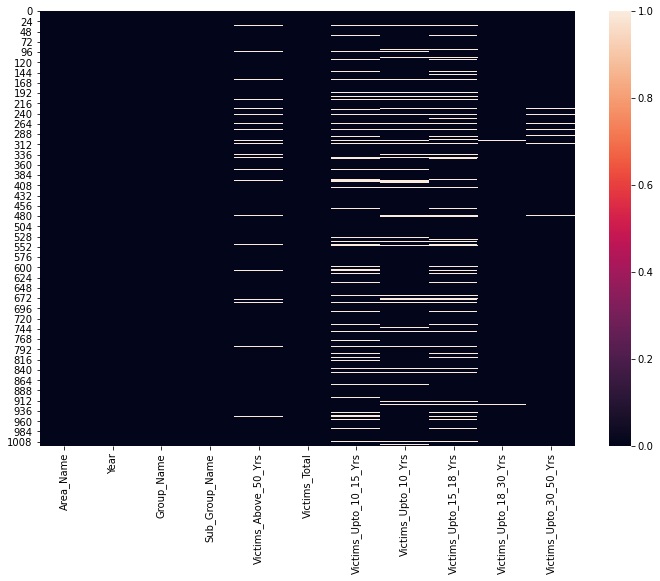

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Area_Name                   0
Year                        0
Group_Name                  0
Sub_Group_Name              0
Victims_Above_50_Yrs       56
Victims_Total               0
Victims_Upto_10_15_Yrs    142
Victims_Upto_10_Yrs       118
Victims_Upto_15_18_Yrs    130
Victims_Upto_18_30_Yrs      9
Victims_Upto_30_50_Yrs     11
dtype: int64

In [12]:
# From above observation int and float columns have null values

# Firstly encoding the categorical columns

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [14]:
le=LabelEncoder()
classified_lis=['Area_Name','Group_Name','Sub_Group_Name']

In [15]:
for i in classified_lis:
    df[i]=le.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area_Name               1018 non-null   int64  
 1   Year                    1018 non-null   int64  
 2   Group_Name              1018 non-null   int64  
 3   Sub_Group_Name          1018 non-null   int64  
 4   Victims_Above_50_Yrs    962 non-null    float64
 5   Victims_Total           1018 non-null   int64  
 6   Victims_Upto_10_15_Yrs  876 non-null    float64
 7   Victims_Upto_10_Yrs     900 non-null    float64
 8   Victims_Upto_15_18_Yrs  888 non-null    float64
 9   Victims_Upto_18_30_Yrs  1009 non-null   float64
 10  Victims_Upto_30_50_Yrs  1007 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 87.6 KB


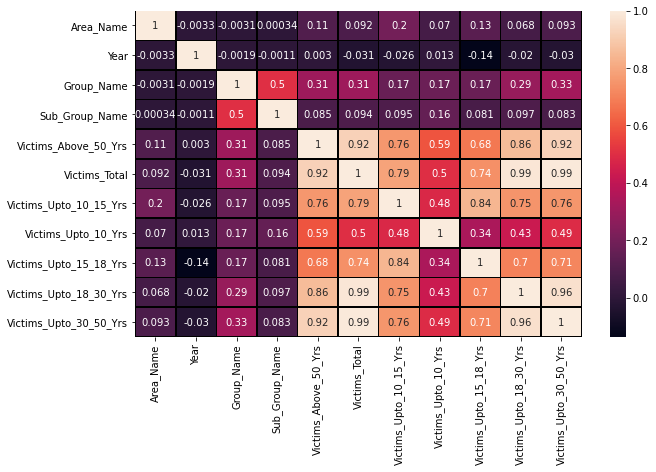

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.5)

In [17]:
# Form heat map it shows that ''Year'' column in not much correalated with Victims_Total.

In [18]:
df.drop('Year',axis=1,inplace=True)

In [19]:
### Imputing Null values 

In [20]:
knn=KNNImputer(n_neighbors=9, weights="uniform")

In [21]:
df.columns

Index(['Area_Name', 'Group_Name', 'Sub_Group_Name', 'Victims_Above_50_Yrs',
       'Victims_Total', 'Victims_Upto_10_15_Yrs', 'Victims_Upto_10_Yrs',
       'Victims_Upto_15_18_Yrs', 'Victims_Upto_18_30_Yrs',
       'Victims_Upto_30_50_Yrs'],
      dtype='object')

In [22]:
knndf=knn.fit_transform(df)
knndf=pd.DataFrame(knndf,columns=df.columns)
knndf

,Area_Name,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,0.0,0.0,1.0,1.333333,6.0,0.555556,0.444444,0.333333,4.0,2.0
1,1.0,0.0,1.0,67.000000,607.0,15.000000,38.000000,43.000000,269.0,175.0
2,2.0,0.0,1.0,2.000000,16.0,0.000000,0.000000,0.000000,10.0,4.0
3,3.0,0.0,1.0,11.000000,128.0,8.000000,4.000000,23.000000,45.0,37.0
4,4.0,0.0,1.0,12.000000,366.0,0.000000,0.000000,40.000000,191.0,123.0
...,...,...,...,...,...,...,...,...,...,...
1013,30.0,2.0,2.0,327.000000,1908.0,13.000000,63.000000,16.000000,650.0,839.0
1014,31.0,2.0,2.0,24.000000,159.0,2.000000,0.000000,0.000000,60.0,73.0
1015,32.0,2.0,2.0,344.000000,4456.0,82.000000,138.000000,126.000000,2358.0,1408.0
1016,33.0,2.0,2.0,19.000000,176.0,1.000000,3.111111,2.000000,91.0,63.0


In [23]:
knndf.isnull().sum()

Area_Name                 0
Group_Name                0
Sub_Group_Name            0
Victims_Above_50_Yrs      0
Victims_Total             0
Victims_Upto_10_15_Yrs    0
Victims_Upto_10_Yrs       0
Victims_Upto_15_18_Yrs    0
Victims_Upto_18_30_Yrs    0
Victims_Upto_30_50_Yrs    0
dtype: int64

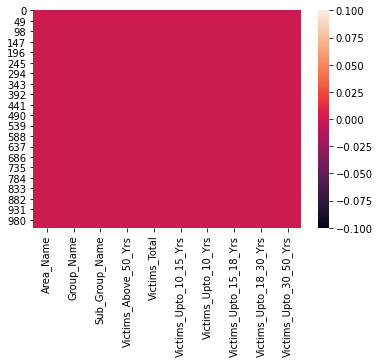

In [24]:
sns.heatmap(knndf.isnull())

In [25]:
# There no any null values now

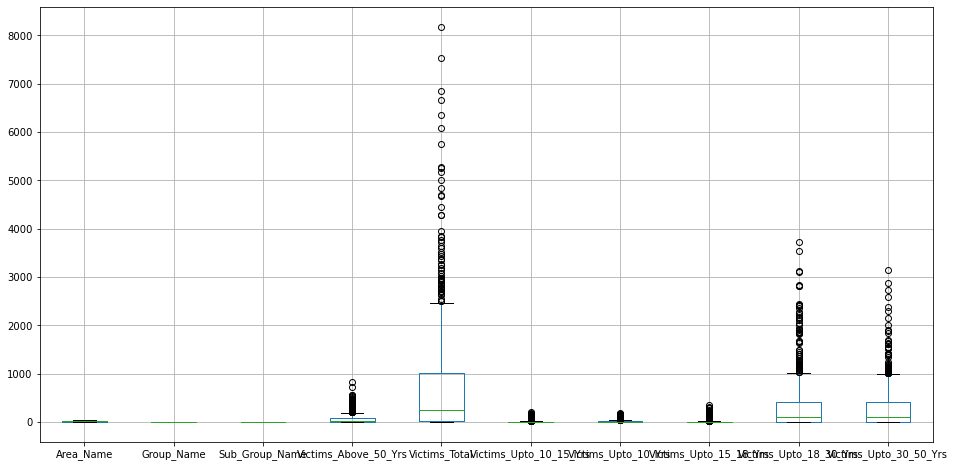

In [26]:
knndf.boxplot(figsize=(16,8))

In [27]:
df.skew()

Area_Name                -0.004787
Group_Name               -0.009039
Sub_Group_Name           -0.005431
Victims_Above_50_Yrs      2.588696
Victims_Total             2.874673
Victims_Upto_10_15_Yrs    5.121326
Victims_Upto_10_Yrs       3.024850
Victims_Upto_15_18_Yrs    4.248743
Victims_Upto_18_30_Yrs    2.967358
Victims_Upto_30_50_Yrs    2.650401
dtype: float64

In [28]:
df.describe()

,Area_Name,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
count,1018.000000,1018.000000,1018.000000,962.000000,1018.000000,876.000000,900.000000,888.000000,1009.000000,1007.000000
mean,17.028487,1.004912,1.002947,67.559252,683.406680,9.536530,14.726667,17.326577,314.739346,274.230387
std,10.224913,0.817084,0.818296,100.650347,1015.595667,21.417212,25.355027,39.497253,483.745420,396.206952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,3.000000,31.000000,0.000000,1.000000,0.000000,13.000000,13.000000
50%,17.000000,1.000000,1.000000,25.000000,258.000000,2.000000,3.000000,3.000000,116.000000,102.000000
75%,26.000000,2.000000,2.000000,86.000000,1011.750000,10.000000,18.000000,14.000000,421.000000,416.500000
max,34.000000,2.000000,2.000000,824.000000,8180.000000,218.000000,189.000000,347.000000,3724.000000,3143.000000


In [29]:
# From above Table and box plot some columns having heigh defference between 75% percentile and max(Ootliers)
#  having high  difference between mean and medin (Skewness)

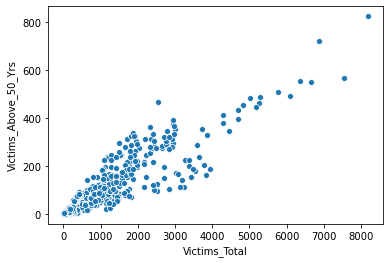

In [30]:
sns.scatterplot(x=knndf['Victims_Total'],y=knndf['Victims_Above_50_Yrs'])

In [31]:
# Before removing outliers. removing skewness in the dataset

In [32]:
from scipy.special import boxcox,boxcox1p

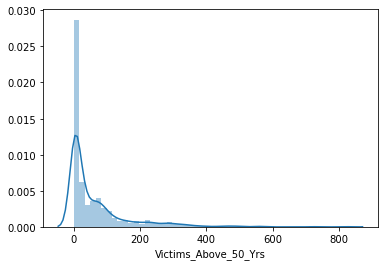

==================Before removing Skewness is  2.664062486187315


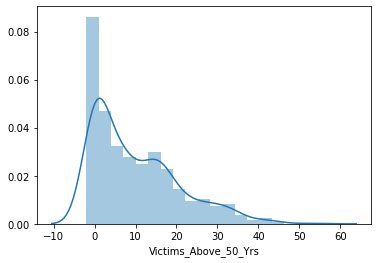

====================After removing Skewness is  1.0454200169055612


In [33]:
sns.distplot(knndf['Victims_Above_50_Yrs'])
plt.show()
print('==================Before removing Skewness is ',knndf['Victims_Above_50_Yrs'].skew())
hc =boxcox(knndf['Victims_Above_50_Yrs'],0.5)
# hc['Victims_Above_50_Yrs'] = np.sqrt(hc['Standard Error'])
# hc['Victims_Above_50_Yrs'] = np.log(hc['Victims_Above_50_Yrs'])
sns.distplot(hc)
plt.show()
print('====================After removing Skewness is ',hc.skew())

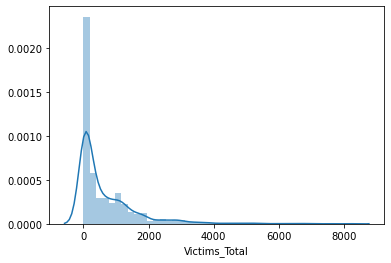

==================Before removing Skewness is  2.874673294207044


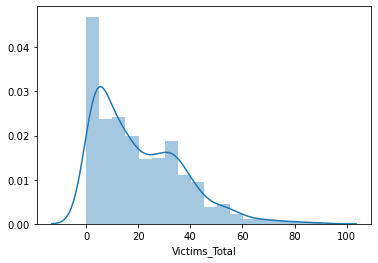

====================After removing Skewness is  0.9993618947007078


In [34]:
sns.distplot(knndf['Victims_Total'])
plt.show()
print('==================Before removing Skewness is ',knndf['Victims_Total'].skew())
# hc =boxcox(df['Victims_Total'],0.5)
hc = np.sqrt(knndf['Victims_Total'])
# hc = np.log(df['Victims_Total'])
sns.distplot(hc)
plt.show()
print('====================After removing Skewness is ',hc.skew())

In [35]:
# By using boxcox skewness is not that much performing well soo usinf PowerTransformer

In [36]:
from sklearn.preprocessing import PowerTransformer

In [37]:
pt=PowerTransformer(method='yeo-johnson')

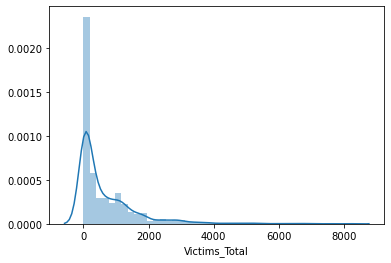

==================Before removing Skewness is  2.874673294207044


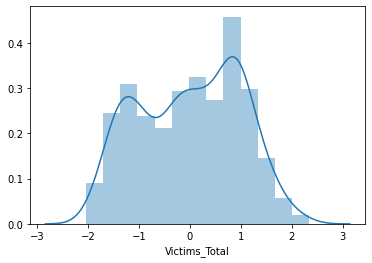

====================After removing Skewness is  -0.0940970724831174


In [38]:
sns.distplot(knndf['Victims_Total'])
plt.show()
print('==================Before removing Skewness is ',knndf['Victims_Total'].skew())
knndf['Victims_Total'] =pt.fit_transform(pd.DataFrame(knndf['Victims_Total']),0.5)
sns.distplot(knndf['Victims_Total'])
plt.show()
print('====================After removing Skewness is ',knndf['Victims_Total'].skew())

In [39]:
col_names=['Victims_Above_50_Yrs','Victims_Total','Victims_Upto_10_15_Yrs','Victims_Upto_10_Yrs','Victims_Upto_15_18_Yrs',
'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs']

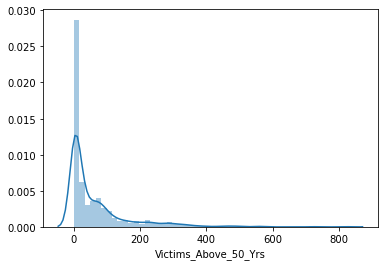

Column Name is Victims_Above_50_Yrs ==================Before removing Skewness is  2.664062486187315


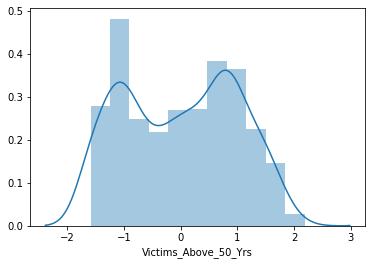

Column Name is Victims_Above_50_Yrs ====================After removing Skewness is  -0.016030519220593956


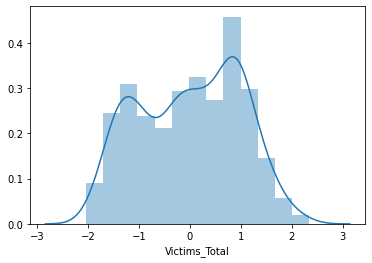

Column Name is Victims_Total ==================Before removing Skewness is  -0.0940970724831174


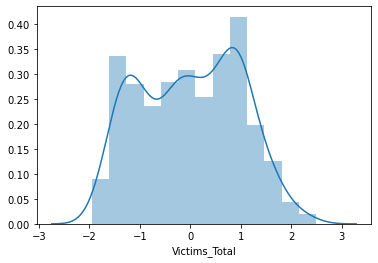

Column Name is Victims_Total ====================After removing Skewness is  0.002292001343681383


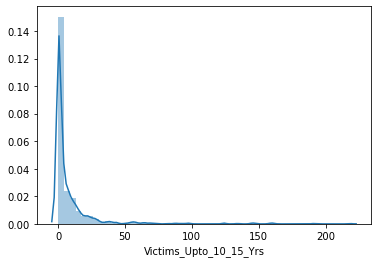

Column Name is Victims_Upto_10_15_Yrs ==================Before removing Skewness is  5.4909668897213


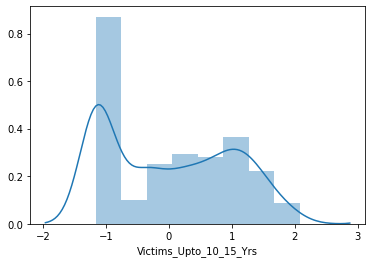

Column Name is Victims_Upto_10_15_Yrs ====================After removing Skewness is  0.21428594599834855


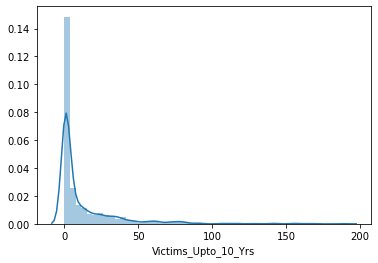

Column Name is Victims_Upto_10_Yrs ==================Before removing Skewness is  3.233734470049158


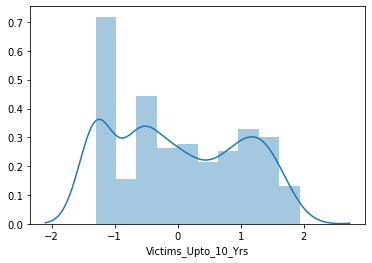

Column Name is Victims_Upto_10_Yrs ====================After removing Skewness is  0.16678862492053897


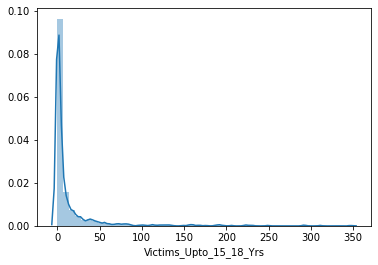

Column Name is Victims_Upto_15_18_Yrs ==================Before removing Skewness is  4.557119635782588


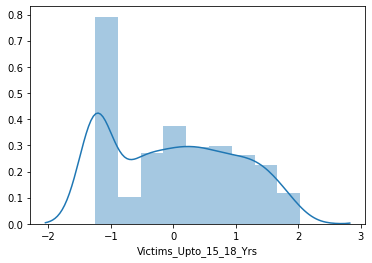

Column Name is Victims_Upto_15_18_Yrs ====================After removing Skewness is  0.18283721687189466


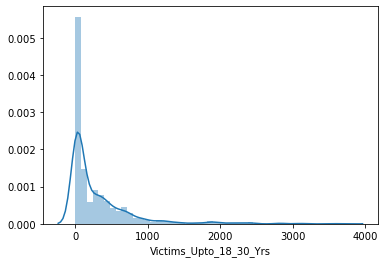

Column Name is Victims_Upto_18_30_Yrs ==================Before removing Skewness is  2.978855314438274


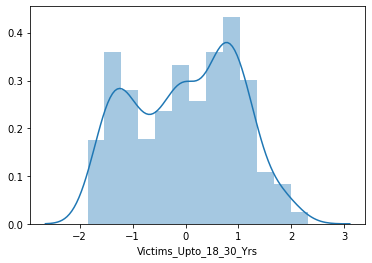

Column Name is Victims_Upto_18_30_Yrs ====================After removing Skewness is  -0.08380319766012982


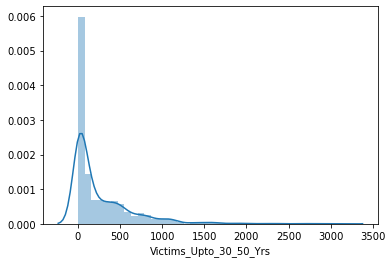

Column Name is Victims_Upto_30_50_Yrs ==================Before removing Skewness is  2.663266675483596


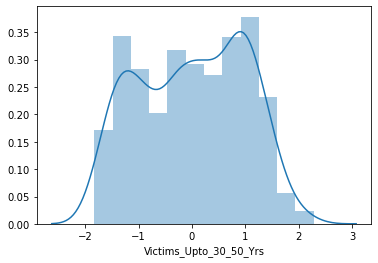

Column Name is Victims_Upto_30_50_Yrs ====================After removing Skewness is  -0.08541744329358451


In [40]:
for col in col_names:
    sns.distplot(knndf[col])
    plt.show()
    print('Column Name is '+col+' ==================Before removing Skewness is ',knndf[col].skew())
    knndf[col] =pt.fit_transform(pd.DataFrame(knndf[col]),0.5)
    sns.distplot(knndf[col])
    plt.show()
    print('Column Name is '+col+' ====================After removing Skewness is ',knndf[col].skew())

In [41]:
# By using Power Transformer Skewness has removed

In [42]:
df.skew()

Area_Name                -0.004787
Group_Name               -0.009039
Sub_Group_Name           -0.005431
Victims_Above_50_Yrs      2.588696
Victims_Total             2.874673
Victims_Upto_10_15_Yrs    5.121326
Victims_Upto_10_Yrs       3.024850
Victims_Upto_15_18_Yrs    4.248743
Victims_Upto_18_30_Yrs    2.967358
Victims_Upto_30_50_Yrs    2.650401
dtype: float64

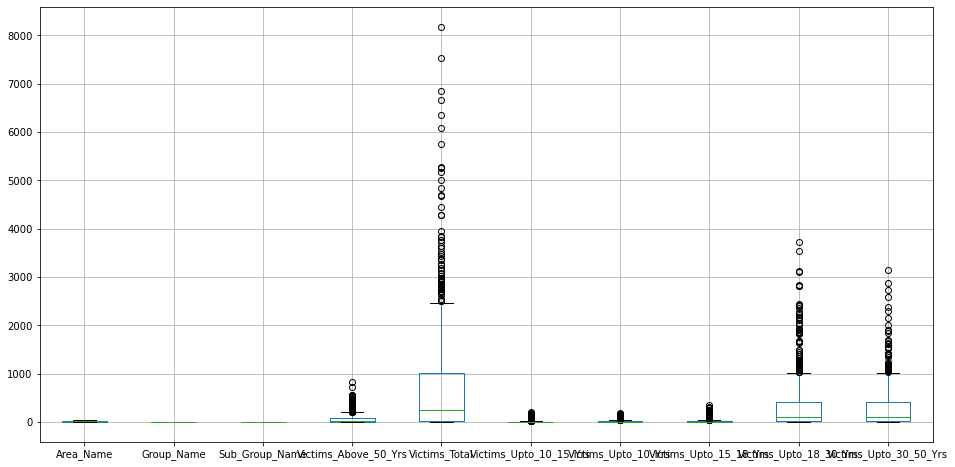

In [43]:
df.boxplot(figsize=(16,8))

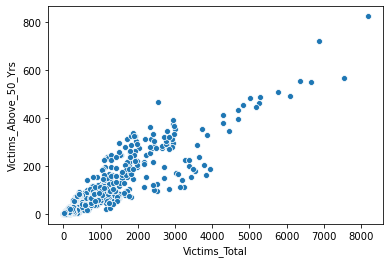

In [44]:
sns.scatterplot(x=df['Victims_Total'],y=df['Victims_Above_50_Yrs'])

In [45]:
## After removing the skewness Outliers got removed

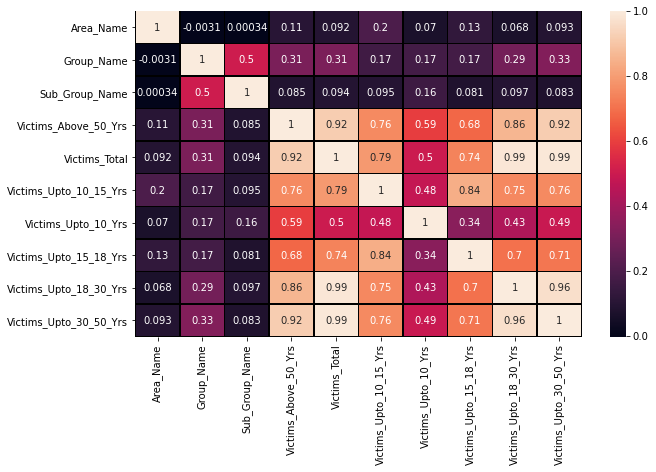

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.5)

In [47]:
## From heatmap we can see that 'Sub Group Name' is less correlated with victim Total.

In [48]:
knndf.drop('Sub_Group_Name',axis=1,inplace=True)

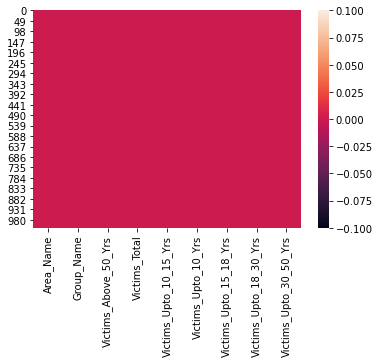

In [49]:
sns.heatmap(knndf.isnull())

# Models Generations

In [50]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [51]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(knndf.drop('Victims_Total',axis=1),knndf['Victims_Total'], test_size=0.25, 
                                                    random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=10).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} \n Cross Validate score is {(crv*100)} \n# difference is {(accu*100)-(crv*100)} \n best random state is{best_state}")

Final accuracy is 99.81716941548139 
 Cross Validate score is 99.74031832248006 
# difference is 0.07685109300132353 
 best random state is202


# Pipeline

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
X_train, X_test, y_train, y_test = train_test_split(knndf.drop('Victims_Total',axis=1),knndf['Victims_Total'], test_size=0.25, 
                                                    random_state=202)

In [54]:
parameters_sgd={
 'penalty': ['l1','l2','elasticnet'],
 'alpha': [0.0001,0.001,0.01,0.1,1],
    'max_iter':[1000,2000],
}
parameters_rndf={
 'criterion': ['mse','mae'],
 'max_features': ['auto','sqrt'],
 'n_estimators': list(np.arange(100,150)),
 'random_state': [202],
    'max_depth':[5],
}
parameters_deci_tree={
 'criterion': ['mse','mae'],
#  'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':[5],
 'random_state': [202]}
parameters_knn_reg={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
    
}
parameters_svr_reg={
    'kernel': ['linear','poly','rbf'],
#     'gamma':['auto','scale'],
#     'max_iter':[500,700,900,1100,1300,1500,1700],
    'max_iter':[500,700],
    
}
parameters_linear_reg = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [55]:
parameter_lis=[parameters_linear_reg,parameters_knn_reg,parameters_svr_reg,parameters_deci_tree,parameters_sgd]
models=[LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),SGDRegressor()]
models_name=['LinearRegression','KNeighborsRegressor','SVR','DecisionTreeRegressor','SGDRegressor']
lis_pipes=[]    
best_score=0
best_model_name=''
cv_score=0
for n,model,model_name,parameter in zip(np.arange(1,6),models,models_name,parameter_lis):
    lis_pipes.append(Pipeline([(model_name,GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring='r2'))]))

for model in lis_pipes:
    gsv=model.fit(X_train,y_train)
    pred=gsv[0].best_estimator_.predict(X_test)
    r2score=r2_score(y_test,pred)
    crv=cross_val_score(model,X_train,y_train,cv=2).mean()
    print(f"Final accuracy is {r2score*100} \n\nCross Validate score is {(crv*100)}\n\n{gsv[0].best_estimator_}\n\n{gsv[0].best_params_}\n\n=====================================================")
    if r2score>best_score and crv>0:
        best_score=r2score
        best_model_name=[]
        best_model_name.append(gsv[0])
        
print(f"Best model name is :  {best_model_name[0]}")
    

Final accuracy is 99.81635104374746 

Cross Validate score is 99.74331661629019

LinearRegression(fit_intercept=False, normalize=True)

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

Final accuracy is 98.76043610158234 

Cross Validate score is 97.88078670441878

KNeighborsRegressor(weights='distance')

{'n_neighbors': 5, 'weights': 'distance'}

Final accuracy is 99.33605166215716 

Cross Validate score is 96.36900757198627

SVR(max_iter=500)

{'kernel': 'rbf', 'max_iter': 500}

Final accuracy is 98.73974930342303 

Cross Validate score is 98.85781785629071

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=202)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'random_state': 202}

Final accuracy is 99.0927248378828 

Cross Validate score is 97.3164447566294

SGDRegressor(alpha=0.1, penalty='elasticnet')

{'alpha': 0.1, 'max_iter': 1000, 'penalty': 'elasticnet'}

Best model name is :  GridSearchCV(cv=5, estimator=LinearRegression(),
       

# Conclusion Best Model is LinearRegression from all above models

In [56]:
######  criterion{“mse”, “mae”}, default=”mse”
def rndtree(a,b):
    accu=0
    best_n=0
    for i in a:
        mod=RandomForestRegressor(n_estimators=i,random_state=b)
        mod.fit(X_train,y_train)
        pred = mod.predict(X_test)
        accuracy=r2_score(y_test,pred)
        if accuracy>accu:
            accu=accuracy
            best_n=i
    mod=RandomForestRegressor(n_estimators=best_n,random_state=b)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    print(r2_score(y_test,predictions)*100)
    print((cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()*100))
    print("best n is ", best_n)

In [57]:
rndtree(list(np.arange(120,170)),96)

99.80483199573831
99.81905907056327
best n is  136


In [58]:
def rftree(a,b,c):
    mod=RandomForestRegressor(n_estimators=i,random_state=b,criterion=c)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    print(r2_score(y_test,pred)*100)
    print((cross_val_score(RandomForestRegressor(n_estimators=i,random_state=b,criterion=c),X_train,y_train,cv=5).mean()*100))

In [61]:
rftree(136,202,'mse')

99.81624663536132
99.81690159010907


In [63]:
rftree(136,202,'mae')

99.80568203166683
99.82398568372093


# Conclusion: Best Model is LinearRegression from all above models